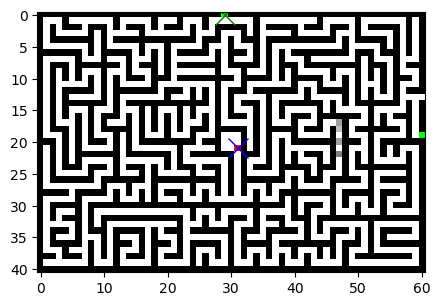

In [15]:
import numpy as np
import matplotlib.pylab as plt
from skimage.morphology import skeletonize
#leggo e ristampo l'immagine
img_name = '../indata/30-20_marked.tiff'
rgb_img = plt.imread(img_name)

plt.figure(figsize=(5,5))
plt.imshow(rgb_img)

#segno con delle x il punto di partenza e di arrivo
x0,y0 = 29, 0
#x1,y1 = 31,21
x2,y2 = 31,21

plt.plot(x0,y0, 'gx', markersize = 14)
#plt.plot(x1,y1, 'rx', markersize = 14)
plt.plot(x2,y2, 'bx', markersize = 14)


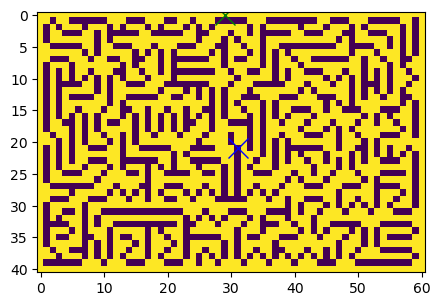

In [9]:
thr_img = rgb_img[:,:,0] > 128
skeleton = skeletonize(thr_img)
plt.figure(figsize=(5,5))
plt.imshow(skeleton)
#map of routes
mapT = ~skeleton
plt.imshow(mapT)
plt.plot(x0,y0, 'gx', markersize=14)
#plt.plot(x1,y1, 'rx', markersize=14)
plt.plot(x2,y2, 'bx', markersize = 14)
#plt.plot(x,y, 'ro')

Optimum route found.


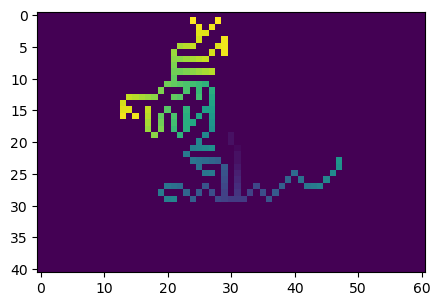

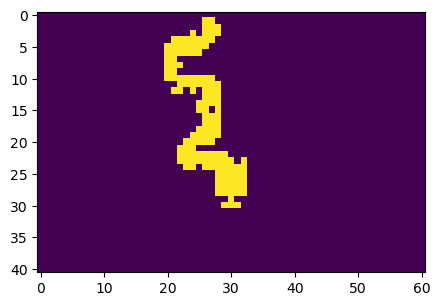

In [12]:
#let'go a temporanery copy of this
_mapt = np.copy(mapT)

#searching to our endpoint and connect to the path
boxr = 3

cpys, cpxs = np.where(_mapt[y2-boxr:y2+boxr, x2-boxr:x2+boxr]==0) #x e y di destinazione


#calibrate points to main scale
cpys += y2-boxr #x e y di destinazione
cpxs += x2-boxr

#find clooset point of possible path endpoints
idx = np.argmin(np.sqrt((cpys-y2)**2 + (cpxs-x2)**2)) #x e y di destinazione
y, x = cpys[idx], cpxs[idx]

pts_x = [x]
pts_y = [y]
pts_c = [0]

#mesh of displacements
xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
ymesh = ymesh.reshape(-1)
xmesh = xmesh.reshape(-1)

dst = np.zeros(thr_img.shape)

#Breath first algorithm exploring a tree
while(True):
    #update distance
    idc = np.argmin(pts_c)
    ct = pts_c.pop(idc)
    x3 = pts_x.pop(idc)
    y3 = pts_y.pop(idc)
    #Search 3x3 neighbourhood for possible
    ys, xs = np.where(_mapt[y3-1:y3+2,x3-1:x3+2] == 0) #x e y generici diversi da destinazione e arrivo
    #Invalidate these point from future searchers
    _mapt[ys+y3-1, xs+x3-1] = ct
    _mapt[y3,x3] = 999999
    #Set the distance in the distance image
    dst[ys+y3-1,xs+x3-1] = ct + 1
    #
    pts_x.extend(xs+x3-1)
    pts_y.extend(ys+y3-1)
    pts_c.extend([ct+1]*xs.shape[0])
    #If we run of points
    if pts_x == []:
        break;
    if np.sqrt((x3-x0)**2 +(y3-y0)**2) < boxr: #x0 prima partenza
        edx3 = x3
        edy3 = y3
        break;

plt.figure(figsize=(5,5))
plt.imshow(dst)

path_x3 = []
path_y3 = []

y3 = edy3
x3 = edx3
while(True):
    nbh = dst[y3-1:y3+2,x3-1:x3+2]
    nbh[1,1] = 9999999
    nbh[nbh==0] = 9999999
    #if we reach a deadend
    if np.min(nbh) == 9999999:
        break;
    idx = np.argmin(nbh)
    #find direction
    y3 += ymesh[idx]
    x3 += xmesh[idx]

    if np.sqrt((x3-x2)**2 + (y3-y2)**2) < boxr:   #arrivo
        print('Optimum route found.')
        break
    path_y3.append(y3)
    path_x3.append(x3)

#duplichiamo il while
while(True):
    #update distance
    idc = np.argmin(pts_c)
    ct = pts_c.pop(idc)
    x4 = pts_x.pop(idc)
    y4 = pts_y.pop(idc)
    #Search 3x3 neighbourhood for possible
    ys, xs = np.where(_mapt[y4-1:y4+2,x4-1:x4+2] == 0)
    #Invalidate these point from future searchers
    _mapt[ys+y4-1, xs+x4-1] = ct
    _mapt[y4,x4] = 999999
    #Set the distance in the distance image
    dst[ys+y4-1,xs+x4-1] = ct + 1
    #
    pts_x.extend(xs+x4-1)
    pts_y.extend(ys+y4-1)
    pts_c.extend([ct+1]*xs.shape[0])
    #If we run of points
    if pts_x == []:
        break;
    if np.sqrt((x4-x1)**2 +(y4-y1)**2) < boxr:  #x1 seconda partenza
        edx4 = x4
        edy4 = y4
        break;

plt.figure(figsize=(5,5))
plt.imshow(dst)

path_x4 = []
path_y4 = []

y4 = edy4
x4 = edx4
while(True):
    nbh = dst[y4-1:y4+2,x4-1:x4+2]
    nbh[1,1] = 9999999
    nbh[nbh==0] = 9999999
    #if we reach a deadend
    if np.min(nbh) == 9999999:
        break;
    idx = np.argmin(nbh)
    #find direction
    y4 += ymesh[idx]
    x4 += xmesh[idx]

    if np.sqrt((x4-x2)**2 + (y4-y2)**2) < boxr:   #arrivo
        print('Optimum route found.')
        break
    path_y4.append(y4)
    path_x4.append(x4)

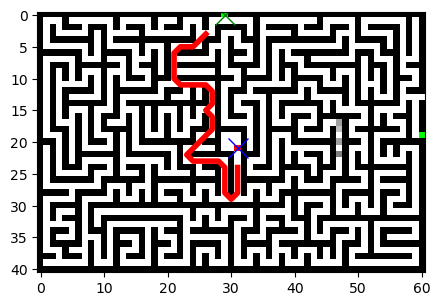

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(rgb_img)
plt.plot(x0,y0, 'gx', markersize=14)
#plt.plot(x1,y1, 'rx', markersize=14)
plt.plot(x2,y2, 'bx', markersize = 14)
plt.plot(path_x3, path_y3, 'r-', linewidth=4)
#plt.plot(path_x4, path_y4, 'g-', linewidth=10)